## 0. Importado de librerías (valor 0.2) 

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_11`. Importe todas las librerías que crea convenientes.**
### Estudiante:
#### Francisco Javier Díaz Perdomo   COD:201912252

$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\xbr}{\bar{x}}
\newcommand{\ome}{\omega}
\newcommand{\lam}{\lambda}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
\newcommand{\pr}{^{\prime}}
\newcommand{\chinu}{\chi_{\nu}^2}
$$

In [1]:
!python -m pip install pyforest
!python -m pip install matplotlib
!python -m pip install scipy
import numpy as np
import scipy as sc
from numpy import random
from scipy.special import factorial
from random import *
import matplotlib.pyplot as plt
%matplotlib inline

# I. La distribución exponencial

## I.1 Generación de los datos (valor 0.8)

Genere aleatoriamonte $10^6$ números $t$ a partir de la [distribución exponencial](https://en.wikipedia.org/wiki/Exponential_distribution), la cual tiene la siguiente función de densidad de probabilidad,
$$
f(t)=\frac{\ee^{-t/\tau}}{\tau}\:\:\:\text{para $t\in[0,\infty)$ .}
\tag{1}
$$
En el fondo esta función modela un **proceso de Poisson** como los _clicks_ en un [contador Geiger](https://en.wikipedia.org/wiki/Geiger_counter). En realidad, con esta función se simula cualquier proceso donde la ocurrencia de un evento es totalmente independiente de los demás, pero existe un número de eventos promedio en un intervalo. En particular, la variable $t$ puede ser el tiempo que hay que esperar entre dos eventos consecutivos siendo $\tau$ su tiempo promedio. Vamos a imaginar que estos tiempos son los segundos que hay que esperar entre dos _clicks_ consecutivos de un contador Geiger. Escoja un valor de $\tau$ entre 0.01 y 0.07 utilizando las función `expovariate` de la librería `random`. **Note que la función `random.expovariate` pide como parámetro:** $\lam=\frac{1}{\tau}$. La lista de números aleatorios debe ser un _array_ de `numpy` llamado `tlist`.

## I.2 Confirmación de estadísticos (valor 0.8)

Consulte en la [página de Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution) cúales son los valores del promedio, la mediana y la desviación estándar de la distribución en función de $\tau$. Estos valores se conocen como **_estadísticos_**. **Note que en Wikipedia el parámetro utilizado es:** $\lam=\frac{1}{\tau}$. Mediante funciones `print`, compare los tres estadísticos mencionados de su lista `tlist` con los que en teoría son predichos para esa distribución. Use por lo menos seis decimales al mostrar los números que está comparando.

## I.3. Confirmación gráfica 1 (valor 0.8)

Realice una gráfica que superponga un histograma de `tlist` debidamente normalizado a la curva $f(t)$ tal como se describe en la Ec. (1). La gráfica debe estar en el intervalo $t\in\pas{0,5\tau}$ y debe tener al menos 40 intervalos de histograma. Además, la gráfica debe tener un título y una leyenda debidamente configurados.

Valores estadísticos calculados:
Promedio: 0.04992858247364723
Mediana:  0.03465646408449535
Desviación estándar:  0.04992004995938251
Valores téoricos:
Promedio: 0.05
Mediana:  0.03465735902799726
Desviación estándar:  0.05


<function matplotlib.pyplot.show(*args, **kw)>

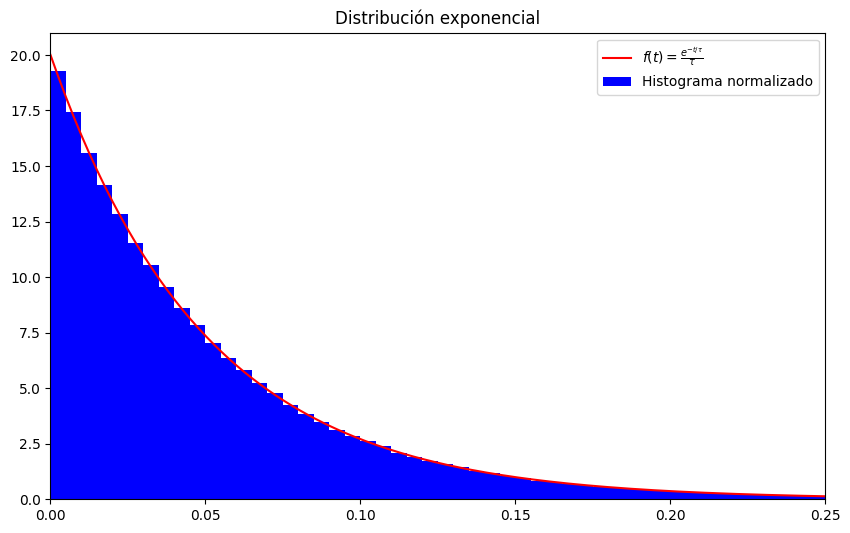

In [2]:
# I. La distribución exponencial
# I.1 Generación de los datos

tau= 0.05
tlist =np.random.exponential(tau,1000000)

# I.2 Comfirmación de estadísticos

print ("Valores estadísticos calculados:")
print ("Promedio:", np.mean(tlist))
print ("Mediana: ", np.median(tlist))
print ("Desviación estándar: ", np.std(tlist))
print ("Valores téoricos:")
print ("Promedio:", tau)
print ("Mediana: ", tau*np.log(2))
print ("Desviación estándar: ",tau)

# I.3 Confirmación gráfica 1
x= np.linspace(0,5*tau,200)
y1=((np.exp(-x/tau))/tau)

plt.figure(figsize=(10,10/1.618),dpi=100)
plt.hist(tlist,50, range= (0, 5*tau),density = True,color = "blue")
plt.plot(x,y1, color ='red')
plt.xlim(0,5*tau)
plt.title("Distribución exponencial")
plt.legend([r'$f(t)= \frac{e^{-t / \tau}}{\tau} $','Histograma normalizado'],loc='best')
######################################
plt.show



## I.3. Confirmación gráfica 2 (valor 0.8)

Realice una gráfica que superponga un histograma de **probabilidades acumuladas** de `tlist` debidamente normalizado a la curva de probabilidad acumulada definida como:
$$
F(t)=1-\ee^{-t/\tau} \;.
\tag{2}
$$ 
La gráfica debe estar en el intervalo $t\in\pas{0,5\tau}$ y debe tener al menos 40 intervalos de histograma. Además, la gráfica debe tener un título y una leyenda debidamente configurados.

<function matplotlib.pyplot.show(*args, **kw)>

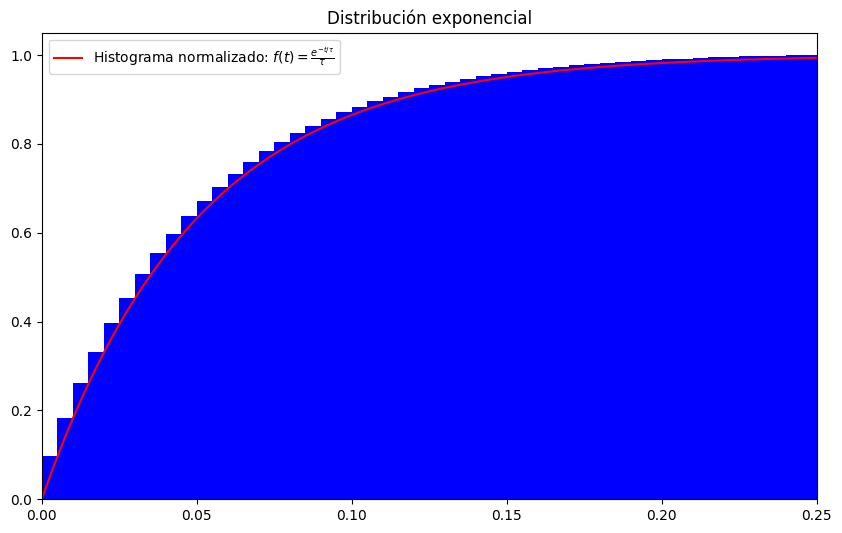

In [3]:
# I.3 Confirmación gráfica 2
plt.figure(figsize=(10,10/1.618),dpi=100)
x= np.linspace(0,5*tau,200)
y2=1-(np.exp(-x/tau))


plt.hist(tlist,50, range= (0, 5*tau),density = True,cumulative = True,color = "blue")
plt.plot(x,y2, color='red')
plt.xlim(0,5*tau)
plt.title("Distribución exponencial")
plt.legend([r'Histograma normalizado: $f(t)= \frac{e^{-t / \tau}}{\tau} $'],loc='best')
######################################
plt.show

# II. La distribución de Poisson

## II.0 Generando los datos

Escoja un valor de la variable `T` entre 0.8 y 3. Con la siguiente celda usted va a generar una nueva lista de números aleatorios llamada `nlist`. Tenga un poco de paciencia, el procesado de los datos tardará unos pocos segundos. Estos nuevos datos son todos enteros y en teoría deberían seguir una [**_distribución de Poisson_**](https://en.wikipedia.org/wiki/Poisson_distribution) con promedio $\mu = \frac{T}{\tau}$. En nuestro ejercicio imaginario, esta variable representa el número de _clicks_ que el contador Geiger detecta en un intervalo de tiempo $T$. 


In [4]:
T=1
def poisson_from_tlist(tlist,tau,T):
    n=len(tlist)
    nlist=[]
    for i in range(n-60*int(np.round(T/tau))):
        n=-1
        x=0
        j=0
        while x<T:
            n+=1
            x+=tlist[i+j]
            j+=1
        nlist.append(n)
    return np.array(nlist)
nlist=poisson_from_tlist(tlist,tau,T)

## II.1 Comparando estadísticos (valor 0.8)

Haga una comparacióna análoga a la del punto **II.2** pero con `nlist` y la distribución de Poisson.

In [5]:
# II.1 Comparando estadísticos

print ("Valores estadísticos calculados:")
print ("Promedio:", np.mean(nlist))
print ("Mediana: ", np.median(nlist))
print ("Desviación estándar: ", np.std(nlist))
print ("Valores téoricos:")
print ("Promedio:", (T/tau))
print ("Mediana: ", (T/tau)+(1/3)-(0.02*tau))
print ("Desviación estándar: ",(1/tau)**(1/2))

Valores estadísticos calculados:
Promedio: 20.033400080096115
Mediana:  20.0
Desviación estándar:  4.485806585910658
Valores téoricos:
Promedio: 20.0
Mediana:  20.33233333333333
Desviación estándar:  4.47213595499958


## II.2 Confirmación gráfica (valor 0.8)

Haga una comparacióna análoga a la del punto **II.3** pero con `nlist` y la distribución de Poisson. Los valores de $n$ recomendados son $n\in\pac{1,2,\ldots,n_{\max}-1,n_{\max}}$ donde $n_{\max}=\left \lceil{2.1 \mu}\right \rceil $ (el entero igual o inmediatamente por encima de $2.1\mu$). En este caso, cada número entero debe tener su probabilidad distinta, para lograr esto, escoja el número de `bins` como $n_{\max}+1$.

<function matplotlib.pyplot.show(*args, **kw)>

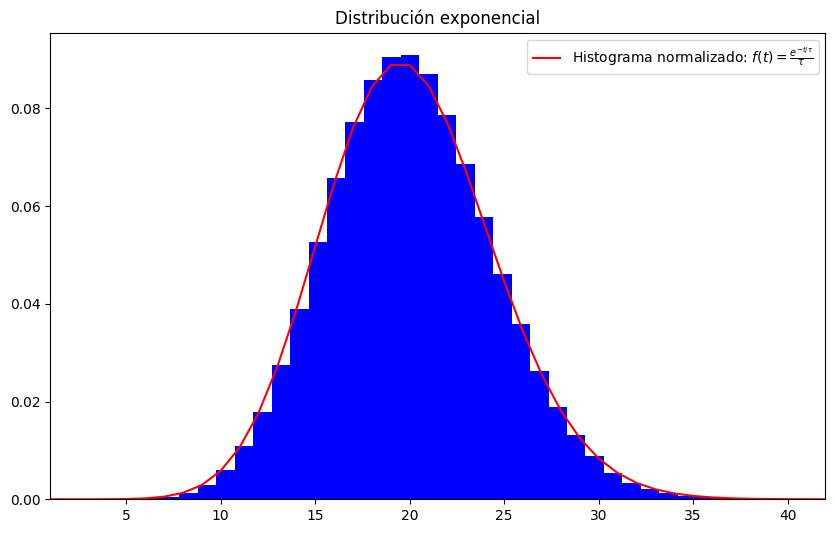

In [6]:
# II.2 Confirmación gráfica

mu= T/tau
nmax= int(np.ceil(2.1*mu))
x= np.linspace(1,nmax,nmax)
y2=(np.power((1/tau),x))*(np.exp(-1/tau))/(sc.special.factorial(x))
                  
plt.figure(figsize=(10,10/1.618),dpi=100)
plt.hist(nlist,nmax+1, range= (0, nmax),density = True,color = "blue")
plt.plot(x,y2, color ='red')
plt.xlim(1,nmax)
plt.title("Distribución exponencial")
plt.legend([r'Histograma normalizado: $f(t)= \frac{e^{-t / \tau}}{\tau} $'],loc='best')
######################################
plt.show
